# Kredytobranie - Wyjaśnianie Decyzji Modelu

![](https://live.staticflickr.com/65535/54368714616_e90a2c644c_z.jpg)

*Obraz wygenerowany za pomocą ChatGPT.*

## Wstęp
Wyobraź sobie, że jesteś analitykiem danych w firmie zajmującej się oceną ryzyka kredytowego. 
Twój zespół opracował model, który na podstawie kluczowych wskaźników finansowych 
podejmuje decyzje o przyznaniu kredytu klientom. Model działa sprawnie, ale pojawił się 
problem - klienci, którym odmówiono kredytu, domagają się konkretnych wyjaśnień.

Kierownictwo firmy zdaje sobie sprawę, że samo powiedzenie "komputer tak zdecydował" 
nie jest wystarczające. Potrzebują czegoś więcej - konkretnych wskazówek dla klientów, 
co mogliby zmienić w swojej sytuacji finansowej, aby otrzymać pozytywną decyzję kredytową.

Jako specjalista ds. uczenia maszynowego zostajesz poproszony o opracowanie systemu, 
który pomoże zrozumieć decyzje modelu i wskaże klientom ścieżkę do uzyskania kredytu.


## Zadanie
Na szczęście, aby lepiej zrozumieć problem i wypracować rozwiązanie, będziesz pracował na uproszczonym,
dwuwymiarowym zbiorze danych. Umożliwi to wizualizację wyników i lepsze zrozumienie działania
Twojego systemu wyjaśnień.

Twoim zadaniem jest zaproponowanie *metody do generowania wyjaśnień* dla odrzuconych wniosków kredytowych, która będzie proponować realistyczne zmiany w wartościach wskaźników finansowych i ostatecznie doprowadzi do pozytywnej decyzji klasyfikatora - sieci neuronowej.

W trakcie pracy nad rozwiązaniem będziesz mógł zobaczyć rezultaty na wykresach, które pokażą:
- Początkowe położenie obserwacji do wyjaśnienia;
- Granicę decyzyjną klasyfikatora;
- Proponowane zmiany w postaci wektorów oraz końcowych propozycji wyjaśnień;
- Wyestymowany rozkład gęstości danych treningowych, który pomoże ocenić realność proponowanych zmian.

### Dane
Dostępne dla Ciebie w tym zadaniu dane to:
- Zbiór danych treningowych;
- Zbiór danych do wyjaśnienia;
- Model dyskryminujący wytrenowany na danych treningowych; ten model będziesz wyjaśniać;
- Model generatywny wykorzystywany do estymacji gęstości rozkładu danych treningowych.

W szczególności, w swojej metodzie do generowania wyjaśnień możesz wykorzystywać jedynie model dyskryminujący, model generatywny oraz dane do wyjaśnienia. Dane treningowe służą jedynie do lepszego zobrazowania celu zadania. 

Twoje rozwiązanie zostanie ostatecznie przetestowane na Platformie Konkursowej na ukrytym zestawie danych testowych, który obejmuje nowe dane treningowe, dane do wyjaśnień oraz model dyskryminatywny i generatywny. Charakterystyka danych testowych nie będzie znacząco odbiegać od zestawu danych udostępnionego do zbudowania rozwiązania. Dodatkowe będą dostępne dla Ciebie dane walidacyjne na Platformie Konkursowej, na których będziesz mógł upewnić się, że całość rozwiązania wykonuje się poprawnie.

### Kryterium Oceny
Jak możesz się spodziewać, w ewaluacji będziemy oceniać trzy kluczowe aspekty Twojego rozwiązania:
1. **Skuteczność Zmiany Decyzji Klasyfikatora** - czy Twoje propozycje faktycznie prowadzą do przyznania kredytu;
2. **Realistyczność Wyjaśnień** - czy znajdują się one w obszarze podobnym do danych treningowych, czyli czy są osiągalne dla klientów;
3. **Odległość Wyjaśnień** - czy proponowane modyfikacje są możliwie najmniejsze, aby nie obciążać klienta nadmiernymi zmianami w jego sytuacji finansowej.

Ponieważ zależy nam na satysfakcji klientów, każdy z tych aspektów będzie musiał przekroczyć pewien próg, abyś otrzymał za niego punkty. Dodatkowo, każdy z nich będzie miał wpływ na końcową ocenę Twojego rozwiązania, zgodnie z formułami przedstawionymi poniżej, a Twój finalny wynik będzie znajdował się w przedziale $[0, 100]$.

Ocena rozwiązania opiera się na trzech głównych metrykach:

**Skuteczność Zmiany Decyzji Klasyfikatora ($V$)** - Miara określająca procent wygenerowanych wyjaśnień, które skutecznie zmieniają decyzję klasyfikatora:

$$V = \begin{cases}
0, & \text{jeśli } validity < 0.50 \\
\frac{validity - 0.50}{1.00 - 0.50}, & \text{jeśli } 0.50 \leq validity \leq 1.00 \\
1, & \text{jeśli } validity > 1.00
\end{cases}$$

gdzie *validity* jest zdefiniowane w następujący sposób:
$$\text{validity} = \frac{1}{N} \sum_{i=1}^{N} \mathbb{1}[f(\mathbf{{x'}_i}) > 0.5],$$
gdzie $\mathbf{{x'}_i}$ to zapronowane wyjaśnienie dla obserwacji $i$, $f$ to model dyskryminatywny, a $N$ to liczba obserwacji.

**Realistyczność Wyjaśnień ($P$)** - Miara określająca procent wygenerowanych wyjaśnień, które są uznawane za realistyczne:

$$P = \begin{cases}
0, & \text{jeśli } plausibility < 0.50 \\
\frac{plausibility - 0.50}{1.00 - 0.50}, & \text{jeśli } 0.50 \leq plausibility \leq 1.00 \\
1, & \text{jeśli } plausibility > 1.00
\end{cases}$$

gdzie *plausibility* jest zdefiniowane w następujący sposób:
$$\text{plausibility} = \frac{1}{N} \sum_{i=1}^{N} \mathbb{1}[\log{P(\mathbf{{x'}_i}|y')} \geq \text{log\_prob\_threshold}],$$
gdzie $\log{P(\mathbf{{x'}_i}|y')}$ to logarytm prawdopodobieństwa zapronowanego $i$-tego wyjaśnienia $\mathbf{{x'}_i}$ pod warunkiem klasy docelowej $y'$ - jest to wynik funkcji `forward` modelu generatywnego `gen_model`. Natomiast $\text{log\_prob\_threshold}$ to próg logarytmu prawdopodobieństwa, który zapronowane wyjaśnienie musi przekroczyć i został on wcześniej wyznaczony na podstawie danych treningowych.

**Odległość Wyjaśnień ($D$)** - Miara określająca, jak bardzo proponowane zmiany różnią się od oryginalnych danych klienta:

$$D = \begin{cases} 
1, & \text{jeśli } \text{odległość L2} < 0.22 \\
\frac{0.30 - \text{odległość L2}}{0.30 - 0.22}, & \text{jeśli } 0.22 \leq \text{odległość L2} \leq 0.30 \\
0, & \text{jeśli } \text{odległość L2} > 0.30.
\end{cases}$$

**Ostateczna Formuła Oceny**
Końcowa ocena jest kombinacją powyższych metryk zgodnie ze wzorem:

$$S = 100 \cdot V \cdot \left(\frac{D}{2} + \frac{P}{2}\right)$$

Ta formuła wyraża, że Skuteczność Zmiany Decyzji Klasyfikatora ($V$) jest mnożona przez Odległość Wyjaśnień ($D$) i Realistyczność Wyjaśnień ($P$). Oznacza to, że aby uzyskać dobry wynik, rozwiązanie musi być skuteczne w zmianie decyzji klasyfikatora, jednocześnie proponując zmiany, które są zarówno realistyczne, jak i efektywne (minimalne). Finalny wynik $S$ mieści się w przedziale $[0, 100]$, gdzie:
- Wartości bliskie $0$ wskazują na słabe rozwiązanie;
- Wartości bliskie $100$ wskazują na doskonałe rozwiązanie, które skutecznie zmienia decyzje klasyfikatora przy jednoczesnym zachowaniu realistyczności i minimalności zmian.

## Ograniczenia
- Twoje rozwiązanie będzie testowane na Platformie Konkursowej bez dostępu do internetu.
- Ewaluacja Twojego finalnego rozwiązania na Platformie Konkursowej nie może trwać dłużej niż 2 minuty.
- Twoje rozwiązanie nie może korzystać ze zbioru treningowego, i.e., `X_train`, `y_train`.
- Dostępne biblioteki: Matplotlib, Numpy, Pandas, PyTorch, Scikit-Learn

## Uwagi i Wskazówki
- Warto zmienić funkcję straty, aby uzyskać lepsze wyniki.
- Warto wykorzystać dostarczony model generatywny do estymacji gęstości rozkładu danych treningowych.

## Pliki Zgłoszeniowe
Ten notebook uzupełniony o Twoje rozwiązanie (patrz funkcja `your_generate_explanations`).

## Ewaluacja
Pamiętaj, że podczas sprawdzania flaga `FINAL_EVALUATION_MODE` zostanie ustawiona na `True`.

Za to zadanie możesz zdobyć pomiędzy 0 a 100 punktów. Liczba punktów, którą zdobędziesz, będzie wyliczona na (tajnym) zbiorze testowym na Platformie Konkursowej na podstawie wyżej wspomnianego wzoru, zaokrąglona do liczby całkowitej. Jeśli Twoje rozwiązanie nie będzie spełniało powyższych kryteriów lub nie będzie wykonywać się prawidłowo, otrzymasz za zadanie 0 punktów.


# Kod Startowy
W tej sekcji inicjalizujemy środowisko poprzez zaimportowanie potrzebnych bibliotek i funkcji. Przygotowany kod ułatwi Tobie efektywne operowanie na danych i budowanie właściwego rozwiązania.

In [1]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

FINAL_EVALUATION_MODE = False  # Podczas sprawdzania ustawimy tę flagę na True.

In [2]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################
# Importy bibliotek
import os

from typing import List, Union

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

from sklearn.inspection import DecisionBoundaryDisplay


In [3]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################
# Reprodukowalność kodu

RANDOM_SEED = 42

os.environ["PYTHONHASHSEED"] = str(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################
# Komórka zawierająca definicje klas modeli.

## Multilayer Perceptron ##

class MultilayerPerceptron(torch.nn.Module):
    def __init__(
        self,
        input_size: int,
        hidden_layer_sizes: List[int],
        target_size: int,
        dropout: float = 0.2,
    ):
        super(MultilayerPerceptron, self).__init__()
        self.target_size = target_size
        self.input_size = input_size
        layer_sizes = [input_size] + hidden_layer_sizes + [target_size]
        self.layers = torch.nn.ModuleList()
        for i in range(len(layer_sizes) - 1):
            self.layers.append(torch.nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(dropout)
        self.target_size = target_size
        if target_size == 1:
            self.final_activation = torch.nn.Sigmoid()
            self.criterion = torch.nn.BCEWithLogitsLoss()
            self.prep_for_loss = lambda x: x.view(-1, 1).float()
        else:
            self.final_activation = torch.nn.Softmax(dim=1)
            self.criterion = torch.nn.CrossEntropyLoss()
            self.prep_for_loss = lambda x: x.view(-1).long()

    def forward(self, x):
        for i in range(len(self.layers)):
            if i == len(self.layers) - 1:
                x = self.layers[i](x)
            else:
                x = self.relu(self.layers[i](x))
        return x

    def fit(
        self,
        train_loader: torch.utils.data.DataLoader,
        test_loader: torch.utils.data.DataLoader = None,
        epochs: int = 200,
        lr: float = 0.001,
        patience: int = 20,
        eps: float = 1e-3,
        checkpoint_path: str = "best_model.pth",
    ):
        min_test_loss = float("inf")
        optimizer = torch.optim.RAdam(self.parameters(), lr=lr)
        for epoch in range(epochs):
            train_loss = 0
            test_loss = 0
            for i, (examples, labels) in enumerate(train_loader):
                optimizer.zero_grad()
                outputs = self.forward(examples)
                loss = self.criterion(outputs, self.prep_for_loss(labels))
                train_loss += loss.item()
                loss.backward()
                optimizer.step()
            train_loss /= len(train_loader)
            if test_loader:
                with torch.no_grad():
                    for i, (examples, labels) in enumerate(test_loader):
                        outputs = self.forward(examples)
                        loss = self.criterion(outputs, self.prep_for_loss(labels))
                        test_loss += loss.item()
                        # Early stopping
                    test_loss /= len(test_loader)
                if test_loss < (min_test_loss - eps):
                    min_test_loss = test_loss
                    patience_counter = 0
                    self.save(checkpoint_path)
                else:
                    patience_counter += 1
                if patience_counter > patience:
                    break
                self.load(checkpoint_path)
            print(
                f"Epoch {epoch}, Train: {train_loss:.4f}, test: {test_loss:.4f}, patience: {patience_counter}"
            )

    def predict(self, X_test: Union[np.ndarray, torch.Tensor]):
        if isinstance(X_test, np.ndarray):
            X_test = torch.from_numpy(X_test).float()
        with torch.no_grad():
            probs = self.predict_proba(X_test) > 0.5
            return probs.squeeze().float()

    def predict_proba(self, X_test: Union[np.ndarray, torch.Tensor]):
        if isinstance(X_test, np.ndarray):
            X_test = torch.from_numpy(X_test).float()
        with torch.no_grad():
            logits = self.forward(X_test)
            probs = self.final_activation(logits)
            return probs.float()

    def save(self, path: str):
        torch.save(self.state_dict(), path)

    def load(self, path: str):
        self.load_state_dict(torch.load(path))


## Kernel Density Estimator ##

class GaussianKernel(nn.Module):
    """Implementation of the Gaussian kernel."""
    
    def __init__(self, bandwidth=1.0):
        """Initializes a new Kernel.

        Args:
            bandwidth: The kernel's (band)width.
        """
        super().__init__()
        self.bandwidth = bandwidth

    def _diffs(self, test_Xs, train_Xs):
        """Computes difference between each x in test_Xs with all train_Xs."""
        test_Xs = test_Xs.view(test_Xs.shape[0], 1, *test_Xs.shape[1:])
        train_Xs = train_Xs.view(1, train_Xs.shape[0], *train_Xs.shape[1:])
        return test_Xs - train_Xs

    def forward(self, test_Xs, train_Xs):
        """Computes log p(x) for each x in test_Xs given train_Xs."""
        n, d = train_Xs.shape
        n, h = torch.tensor(n, dtype=torch.float32), torch.tensor(self.bandwidth)
        pi = torch.tensor(np.pi)

        Z = 0.5 * d * torch.log(2 * pi) + d * torch.log(h) + torch.log(n)
        diffs = self._diffs(test_Xs, train_Xs) / h
        log_exp = -0.5 * torch.norm(diffs, p=2, dim=-1) ** 2

        return torch.logsumexp(log_exp - Z, dim=-1)

    @torch.no_grad()
    def sample(self, train_Xs):
        """Generates samples from the kernel distribution."""
        device = train_Xs.device
        noise = torch.randn(train_Xs.shape, device=device) * self.bandwidth
        return train_Xs + noise


class KernelDensityEstimator(nn.Module):
    """The KernelDensityEstimator model."""

    def __init__(self, train_Xs, kernel=None):
        """Initializes a new KernelDensityEstimator.

        Args:
            train_Xs: The "training" data to use when estimating probabilities.
            kernel: The kernel to place on each of the train_Xs.
        """
        super().__init__()
        self.kernel = kernel or GaussianKernel()
        self.train_Xs = nn.Parameter(train_Xs, requires_grad=False)
        assert len(self.train_Xs.shape) == 2, "Input cannot have more than two axes."

    def __call__(self, x, *args, **kwargs):
        """Saves input tensor attributes so they can be accessed during sampling."""
        if getattr(self, "_c", None) is None and x.dim() == 4:
            _, c, h, w = x.shape
            self._create_shape_buffers(c, h, w)
        return super().__call__(x, *args, **kwargs)

    def load_state_dict(self, state_dict, strict=True):
        """Registers dynamic buffers before loading the model state."""
        if "_c" in state_dict and not getattr(self, "_c", None):
            c, h, w = state_dict["_c"], state_dict["_h"], state_dict["_w"]
            self._create_shape_buffers(c, h, w)
        super().load_state_dict(state_dict, strict)

    def _create_shape_buffers(self, channels, height, width):
        channels = channels if torch.is_tensor(channels) else torch.tensor(channels)
        height = height if torch.is_tensor(height) else torch.tensor(height)
        width = width if torch.is_tensor(width) else torch.tensor(width)
        self.register_buffer("_c", channels)
        self.register_buffer("_h", height)
        self.register_buffer("_w", width)

    @property
    def device(self):
        return self.train_Xs.device

    def forward(self, x):
        return self.kernel(x, self.train_Xs)

    @torch.no_grad()
    def sample(self, n_samples):
        idxs = np.random.choice(range(len(self.train_Xs)), size=n_samples)
        return self.kernel.sample(self.train_Xs[idxs])


class KDE(torch.nn.Module):
    def __init__(self, bandwidth=0.1, **kwargs):  # Ignores kwargs!
        super(KDE, self).__init__()
        self.bandwidth = bandwidth
        self.models = nn.ModuleDict()

    def _context_to_key(self, context):
        return str(int(context))

    def _get_model_for_context(self, context):
        key = self._context_to_key(context)
        if key not in self.models:
            raise ValueError(f"Context {key} not found in the model.")
        return self.models[key]

    def load_state_dict(
            self,
            state_dict,
            strict: bool = True,
            assign: bool = False,
    ):
        for key in state_dict.keys():
            if key.startswith("models."):
                self.models[key.split(".")[1]] = KernelDensityEstimator(
                    state_dict[key], kernel=GaussianKernel(bandwidth=self.bandwidth)
                )
        return super().load_state_dict(state_dict, strict, assign)

    def fit(
            self,
            train_loader: torch.utils.data.DataLoader,
            test_loader: torch.utils.data.DataLoader,
            checkpoint_path: str = "best_model.pth",
            **kwargs,
    ):
        train_Xs, train_ys = train_loader.dataset.tensors
        train_ys = train_ys.view(-1)
        for y in train_ys.unique():
            idxs = train_ys == y
            self.models.update(
                {
                    self._context_to_key(y.item()): KernelDensityEstimator(
                        train_Xs[idxs], kernel=GaussianKernel(bandwidth=self.bandwidth)
                    )
                }
            )
        self.save(checkpoint_path)

        train_log_probs = self.predict_log_prob(train_loader)
        test_log_probs = self.predict_log_prob(test_loader)
        print(f"Train log-likelihood: {train_log_probs.float().mean()}")
        print(f"Test log-likelihood: {test_log_probs.float().mean()}")

    def forward(self, x: torch.Tensor, context: torch.Tensor):
        preds = torch.zeros_like(context)
        for i in range(x.shape[0]):
            model = self._get_model_for_context(context[i].item())
            preds[i] = model(x[i].unsqueeze(0))
        return preds.view(-1)

    def predict_log_prob(self, dataloader: torch.utils.data.DataLoader):
        inputs, context = dataloader.dataset.tensors
        preds = self(inputs, context)
        preds = torch.zeros_like(context, dtype=torch.float32)
        for i in range(inputs.shape[0]):
            model = self._get_model_for_context(context[i].item())
            preds[i] = model(inputs[i].unsqueeze(0))
        return preds

    def save(self, path):
        torch.save(self.state_dict(), path)

    def load(self, path):
        self.load_state_dict(torch.load(path))


In [5]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################
# Komórka zawierająca funkcje pomocnicze do rysowania wykresów.

## FUNKCJE POMOCNICZE ##

def _plot_generative_model_distribution(ax, model, log_prob_threshold=None):
    xline = torch.linspace(-0, 1, 200)
    yline = torch.linspace(-0, 1, 200)
    xgrid, ygrid = torch.meshgrid(xline, yline)
    xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

    with torch.no_grad():
        zgrid = model(xyinput, torch.ones(40000, 1)).exp().reshape(200, 200)
        zgrid = zgrid.numpy()
        _ = ax.contour(
            xgrid.numpy(),
            ygrid.numpy(),
            zgrid,
            levels=10,
            cmap="Greys",
            linewidths=0.4,
            antialiased=True,
        )
        ax.plot([], [], color='grey', alpha=0.3, label="Poziomice gęstości danych treningowych")

    if log_prob_threshold is not None:
        prob_threshold_exp = np.exp(log_prob_threshold)
        _ = ax.contourf(
            xgrid.numpy(),
            ygrid.numpy(),
            zgrid,
            levels=[prob_threshold_exp, prob_threshold_exp * 10.00],
            alpha=0.1,
            colors="#DC143C",
        )  # 10.00 is an arbitrary huge value to colour the whole distribution.
        ax.plot([], [], color='#DC143C', alpha=0.3, label="Obszar realistyczności wyjaśnień")

    return ax


def _plot_classifier_decision_region(ax, model):
    xline = torch.linspace(0, 1, 1000)
    yline = torch.linspace(0, 1, 1000)
    xgrid, ygrid = torch.meshgrid(xline, yline, indexing="ij")
    xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

    y_hat = model.predict(xyinput)
    y_hat = y_hat.reshape(1000, 1000)

    display = DecisionBoundaryDisplay(xx0=xgrid, xx1=ygrid, response=y_hat)
    display.plot(plot_method="contour", ax=ax, alpha=0.3)
    ax.plot([], [], color='green', alpha=0.3, label="Granica decyzyjna modelu")
    return ax


def _plot_propositions(ax, propositions):
    ax.scatter(
        propositions[:, 0], 
        propositions[:, 1], 
        c="orange", 
        s=50, 
        alpha=0.8,
        label="Wyjaśnienia"
    )
    return ax


def _plot_observations(ax, observations, targets):
    indices = targets == 0

    observations_0 = observations[indices]
    observations_1 = observations[~indices]
    
    ax.scatter(
        observations_0[:, 0],
        observations_0[:, 1],
        c="blue",
        s=50,
        alpha=0.8,
        label="Obserwacje z klasy 0"
    )

    ax.scatter(
        observations_1[:, 0],
        observations_1[:, 1],
        c="red",
        s=50,
        alpha=0.8,
        label="Obserwacje z klasy 1"
    )
    return ax


def _plot_observations_to_explain(ax, observations):
    ax.scatter(
        observations[:, 0],
        observations[:, 1],
        c="blue",
        s=50,
        alpha=0.8,
        label="Obserwacje do wyjaśnienia"
    )
    return ax


def _plot_arrows(ax, observations, propositions):
    for i in range(len(observations)):
        ax.arrow(
            observations[i, 0],
            observations[i, 1],
            propositions[i, 0] - observations[i, 0],
            propositions[i, 1] - observations[i, 1],
            width=0.001,
            lw=0.001,
            length_includes_head=True,
            alpha=0.5,
            color="k",
        )
    return ax


def plot_initial_setup(X_orig, y_orig, disc_model=None, gen_model=None, log_prob_threshold=None):
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(20, 12)

    ax = _plot_observations(ax, X_orig, y_orig)

    if disc_model:
        ax = _plot_classifier_decision_region(ax, disc_model)
    if gen_model:
        ax = _plot_generative_model_distribution(
            ax, gen_model, log_prob_threshold=log_prob_threshold
        )

    ax.legend(loc="lower left")
    return fig, ax


def plot_explanation_setup(X_orig, X_new=None, disc_model=None, gen_model=None, log_prob_threshold=None):
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(20, 12)

    ax = _plot_observations_to_explain(ax, X_orig)
    
    if disc_model:
        ax = _plot_classifier_decision_region(ax, disc_model)
    
    if gen_model:
        ax = _plot_generative_model_distribution(
            ax, gen_model, log_prob_threshold=log_prob_threshold
        )
    
    if X_new is not None:
        assert (
                X_orig.shape == X_new.shape
        ), f"Sizes of test set and counterfactuals are not equal. Actual sizes: X_orig: {X_orig.shape}, X_cf: {X_new.shape}"

        ax = _plot_propositions(ax, X_new)
        ax = _plot_arrows(ax, X_orig, X_new)
    
    ax.legend(loc="lower left")
    return fig, ax


In [6]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

# Definicja ścieżek do zbiorów danych oraz modeli
DATA_DIRECTORY = 'data'

ARRAY_X_TRAIN_PATH = f'{DATA_DIRECTORY}/x_train.npy'
ARRAY_X_EXPLAIN_PATH = f'{DATA_DIRECTORY}/x_explain.npy'
ARRAY_Y_TRAIN_PATH = f'{DATA_DIRECTORY}/y_train.npy'

DISC_MODEL_PATH = f'{DATA_DIRECTORY}/disc_model.pth'
GEN_MODEL_PATH = f'{DATA_DIRECTORY}/gen_model.pth'
LOG_PROB_THRESHOLD_PATH = f'{DATA_DIRECTORY}/log_prob_threshold.txt'


## Ładowanie Danych
W tej części zadania załadujemy dane treningowe, które zostały wykorzystane do treningu modelu dyskryminującego.

In [7]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

X_train = np.load(ARRAY_X_TRAIN_PATH)
y_train = np.load(ARRAY_Y_TRAIN_PATH)

Wyświetlmy dane treningowe.

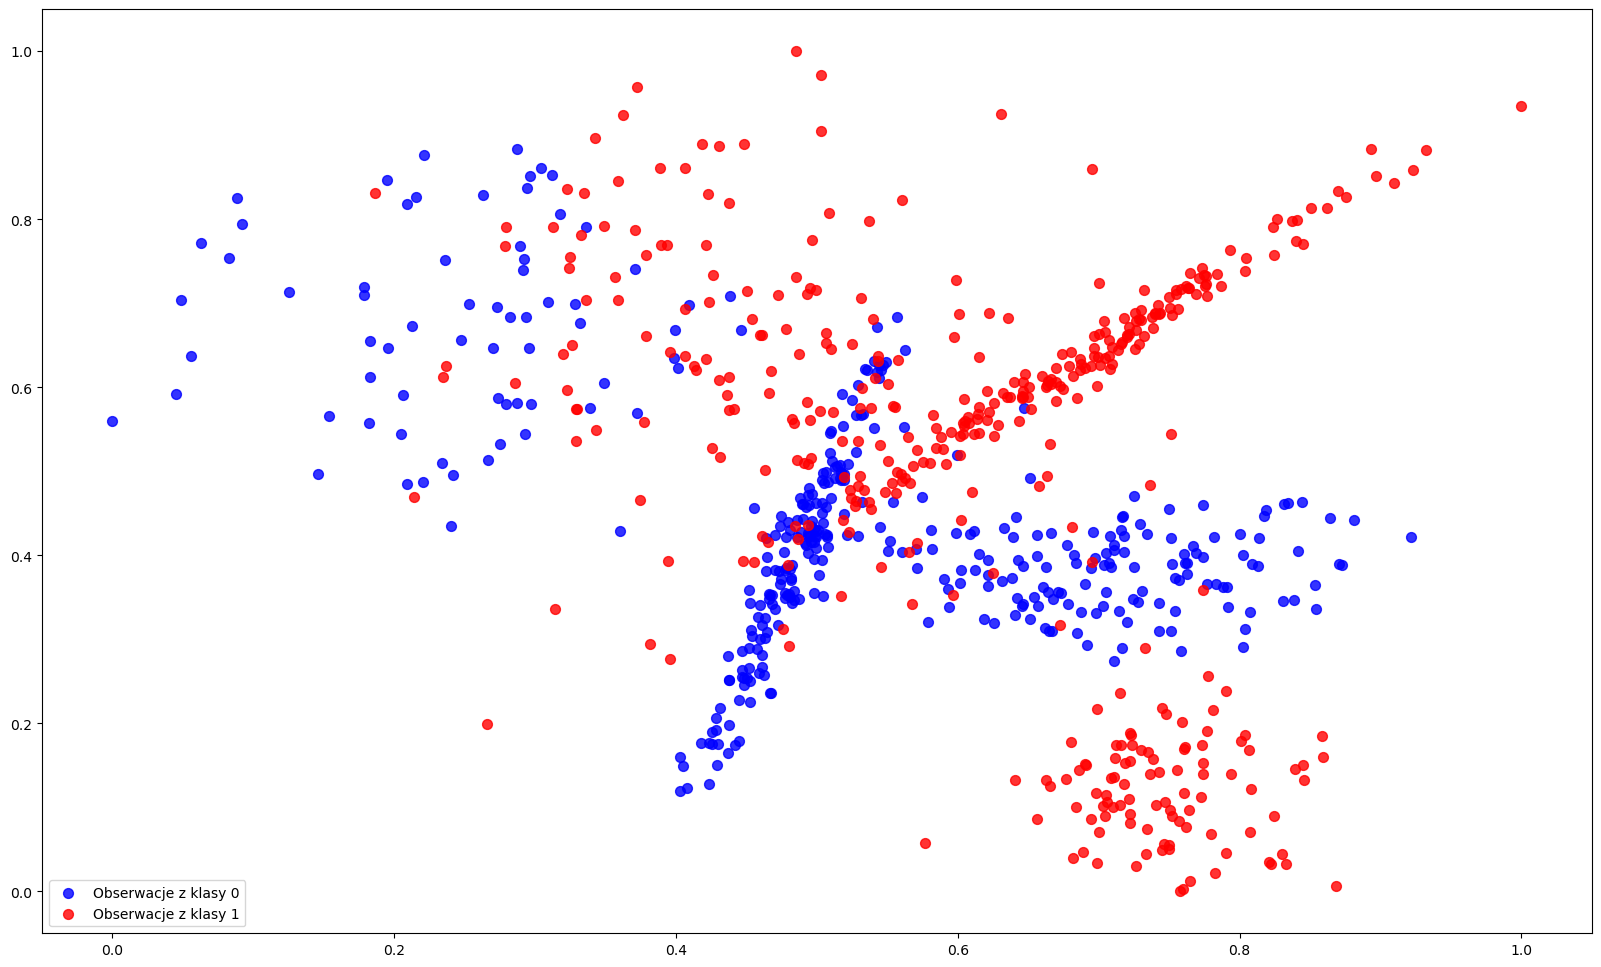

In [8]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

if not FINAL_EVALUATION_MODE:
    fig, ax = plot_initial_setup(X_train, y_train)
    fig.show()

## Ładowanie Modelu Dyskryminujacęgo

W tym zadaniu będziemy wyjaśniać model prostej sieci neuronowej, która została wcześniej wytrenowana.

In [9]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

disc_model = MultilayerPerceptron(
    input_size=2, 
    hidden_layer_sizes=[256, 256], 
    target_size=1, 
    dropout=0.1
)
disc_model.load(DISC_MODEL_PATH)
disc_model.eval()

/tmp/ipykernel_3789/3631179248.py:104: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path))


MultilayerPerceptron(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=1, bias=True)
  )
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (final_activation): Sigmoid()
  (criterion): BCEWithLogitsLoss()
)

Wyświetlmy zbiór danych oraz granice decyzjną modelu.

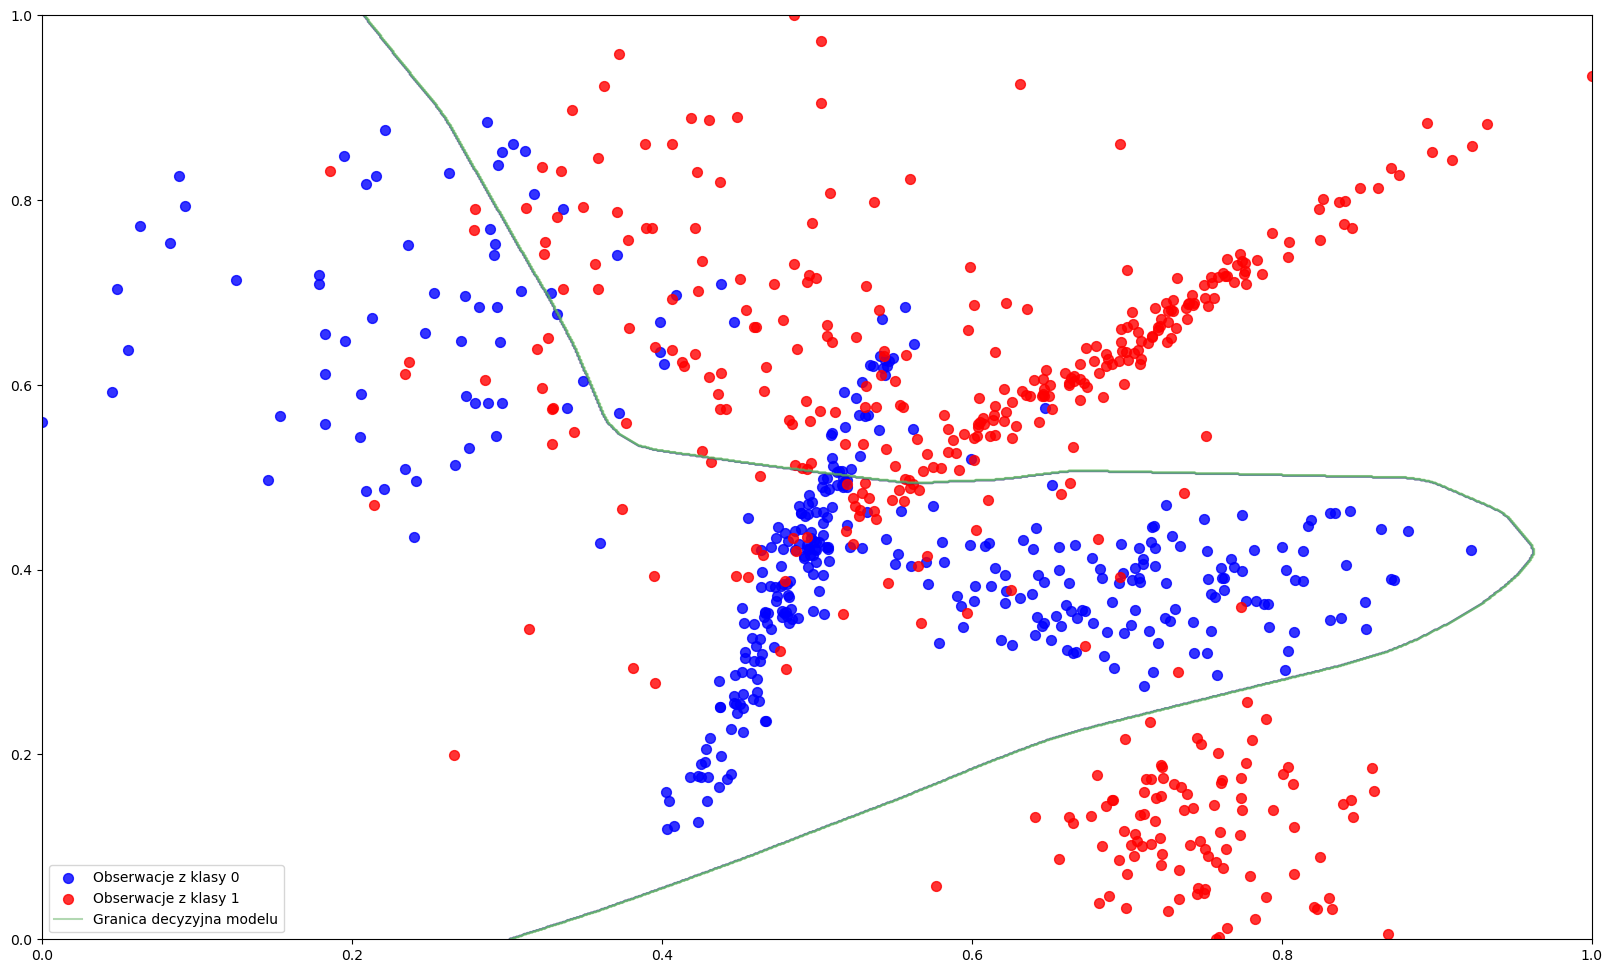

In [10]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

if not FINAL_EVALUATION_MODE:
    fig, ax = plot_initial_setup(X_train, y_train, disc_model=disc_model)
    fig.show()

## Realistyczność Wyjaśnień

W tym zadaniu skupimy się na ważnym aspekcie generowania wyjaśnień - chcemy, aby wygenerowane punkty były realistyczne, a w naszym przypadku będziemy to defniować jako pochodzenie z obszaru o wysokiej gęstości rozkładu danych treningowych.
   
Zacznijmy od zapoznania się z zagadnieniem estymacji gęstości rozkładu danych. Estymacja gęstości rozkładu (density estimation) to zadanie polegające na znalezieniu funkcji $p(x)$,
która przybliża prawdziwy rozkład prawdopodobieństwa danych $p^*(x)$. Formalnie, mając zbiór próbek
${x_1, ..., x_n}$ pochodzących z nieznanego rozkładu $p^*(x)$, chcemy znaleźć model $p(x)$, który
najlepiej przybliża ten rozkład.

W tym zadaniu wykorzystamy model estymatora jądrowego (ang. Kernel Density Estimation (KDE)), który jest jednym z najpopularniejszych modeli estymacji gęstości rozkładu. Jako kryterium progu akceptowalności realistyczności przyjmiemy jako medianę wartości funkcji gęstości dla punktów treningowych, którą wcześniej dla Ciebie została policzona. Oznacza to, że funkcja gęstości KDE dla propozycji nowych zmiennych dla klienta powinna mieć wartość powyżej progu akceptowalności. Ten koncept jest zwizualizowany na kolejnym wykresie w postaci czerwonego obszaru. 


## Ładowanie Modelu Generatywnego wraz z Progiem Akceptowalności

In [11]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

gen_model = KDE(bandwidth=0.05)
gen_model.load(GEN_MODEL_PATH)
gen_model.eval()

with open(LOG_PROB_THRESHOLD_PATH, 'r') as f:
    log_prob_threshold = float(f.read())


/tmp/ipykernel_3789/3631179248.py:270: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path))


Wyświetlmy setup modelu, danych oraz gęstości rozkładu danych

/opt/micromamba/envs/olimpiadaai/lib/python3.11/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647429097/work/aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


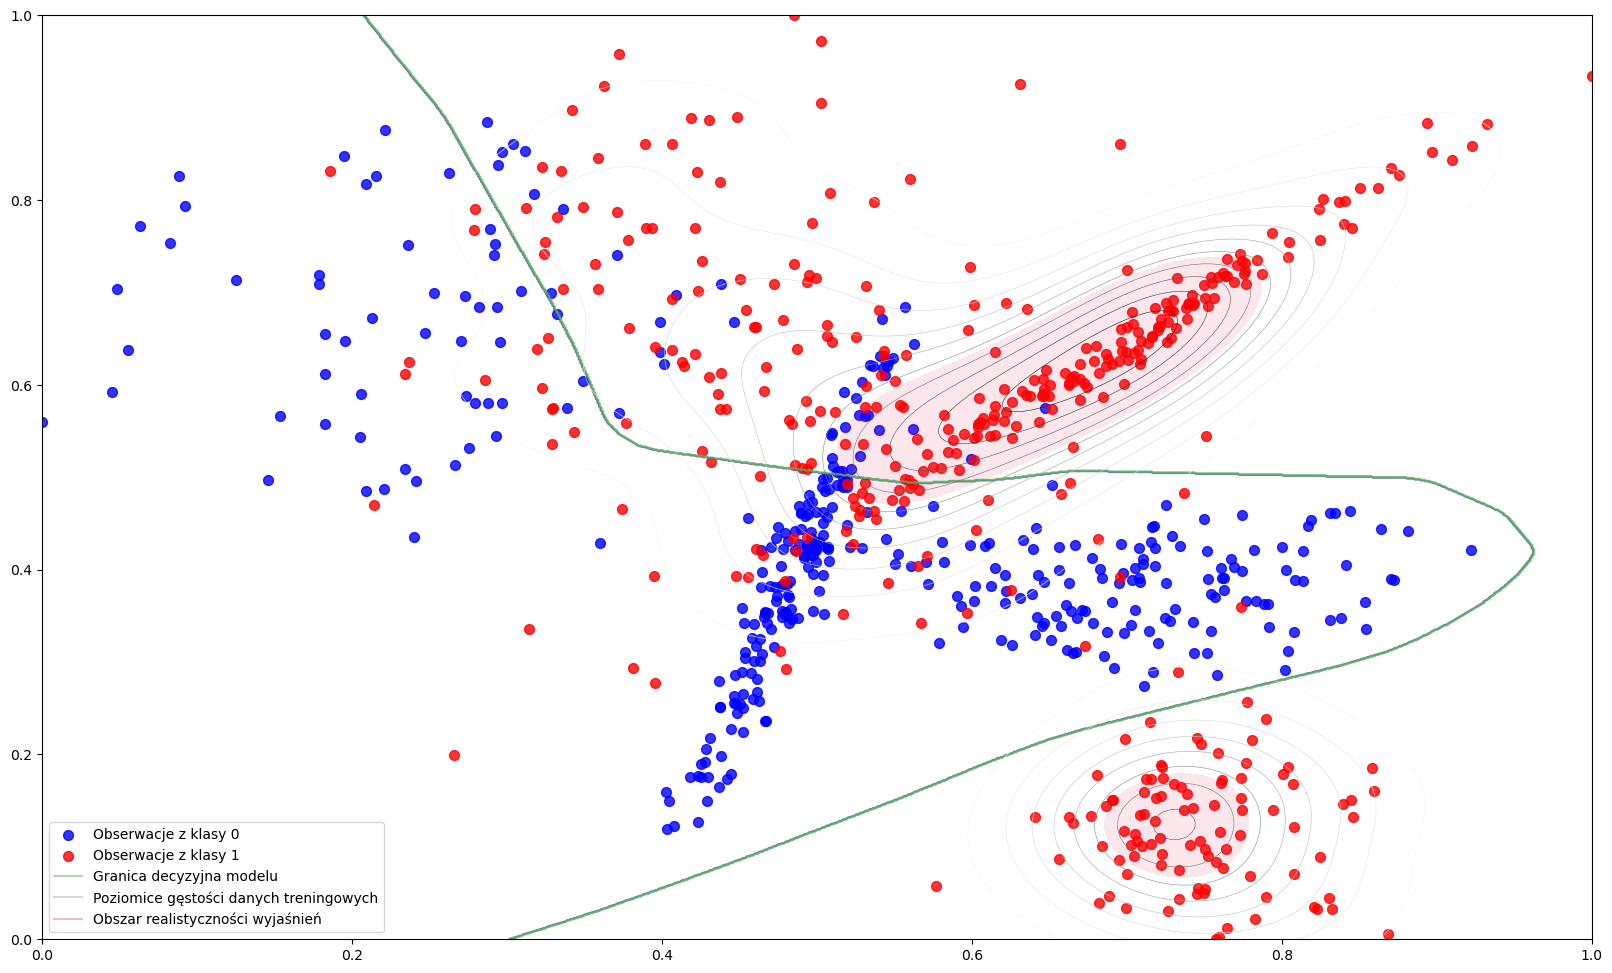

In [12]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

if not FINAL_EVALUATION_MODE:
    fig, ax = plot_initial_setup(
        X_train,
        y_train,
        disc_model=disc_model,
        gen_model=gen_model,
        log_prob_threshold=log_prob_threshold
    )
    fig.show()

## Ładowanie Danych do Wyjaśnienia
W tej części zadania załadujemy zbiór danych do wyjaśnienia. Twoim zdaniem będzie wygenerowanie wyjaśnień dla punktów z tego zbioru danych.


In [13]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

X_explain = np.load(ARRAY_X_EXPLAIN_PATH)
y_explain = np.ones((X_explain.shape[0], 1))  # Wektor 1 - klasa na którą chcemy zmienić decyzję modelu

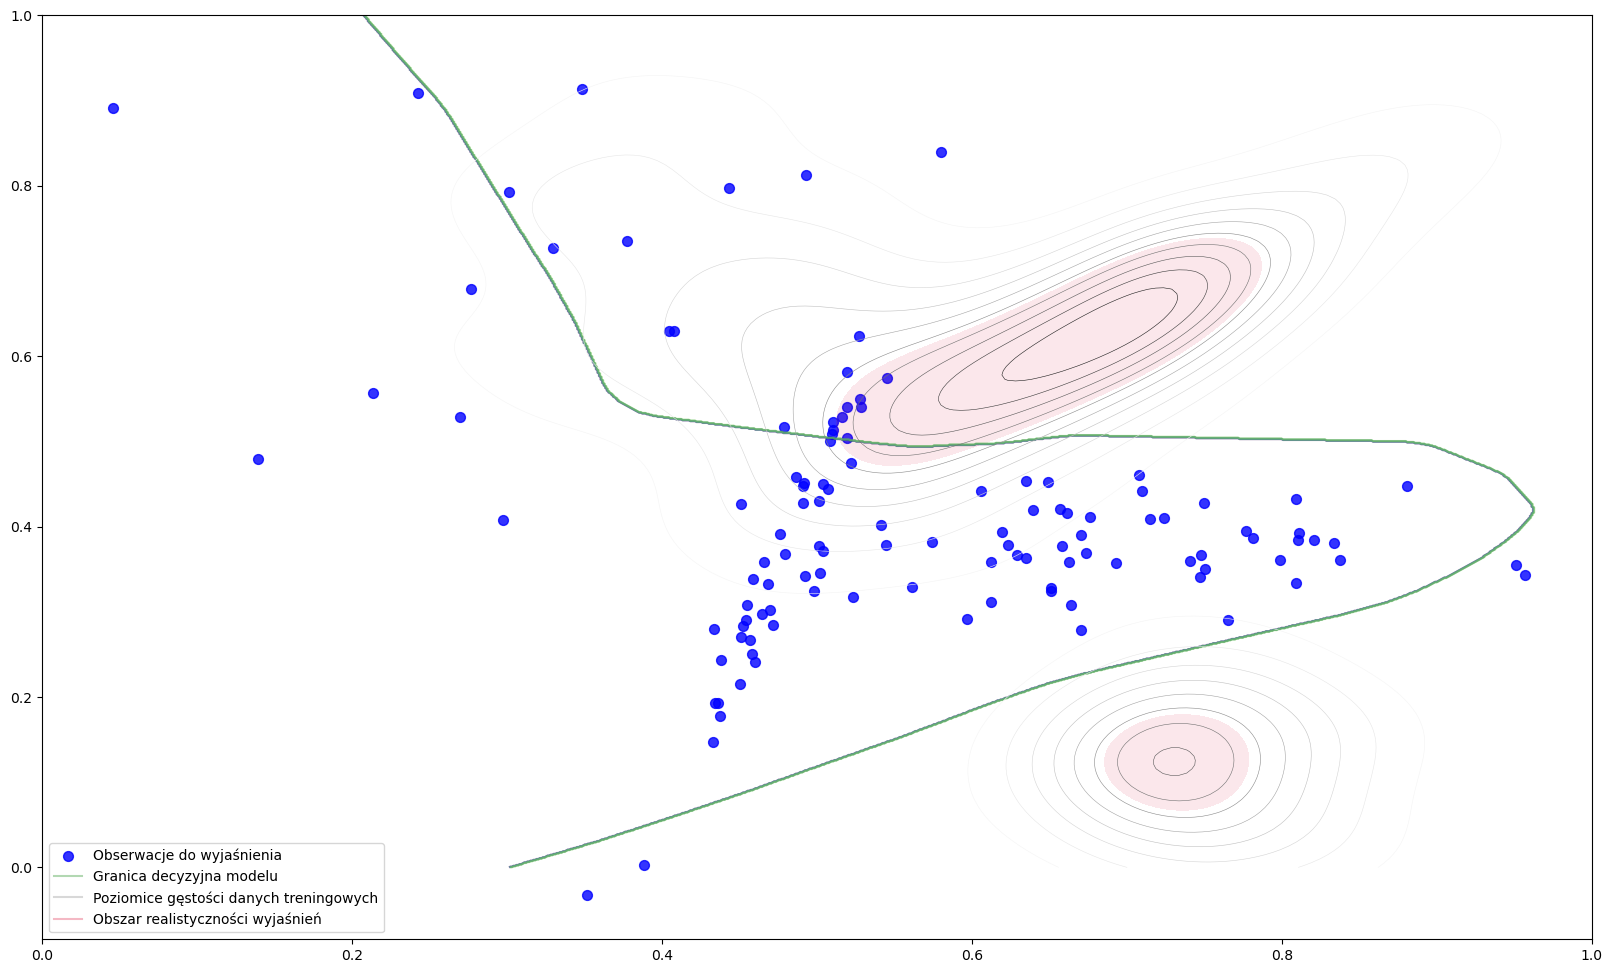

In [14]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

if not FINAL_EVALUATION_MODE:
    fig, ax = plot_explanation_setup(X_explain, disc_model=disc_model, gen_model=gen_model, log_prob_threshold=log_prob_threshold)
    fig.show()

## Przykładowe Rozwiazanie
Poniżej przedstawiamy uproszczone rozwiązanie, które służy jako przykład demonstrujący podstawową funkcjonalność notatnika. Może ono posłużyć jako punkt wyjścia do opracowania Twojego rozwiązania.

Jednym ze sposobów rozwiązania powyższego problemu jest metoda optymalizacji punktu docelowego $x^*$ poprzez minimalizację następującej funkcji celu:

$$ L(x^*) = \text{BCE}(f(x^*), y^*) + \lambda \cdot |x^* - x|^2_2 $$

gdzie:
- $\text{BCE}$ to funkcja straty binary cross-entropy
- $f(x^*)$ to predykcja modelu dla punktu $x^*$
- $y^*$ to pożądana klasa docelowa 
- $|x^* - x|_2^2$ to kwadrat odległości euklidesowej między punktem x* a punktem wyjściowym x
- $\lambda$ to parametr regulacji kompromisu między składowymi funkcji straty (w implementacji $\lambda$=0.1)

Jest to podstawowe podejście, które nie uwzględnia rozkładu danych treningowych. Poniżej znajdziesz przykładowa implementacje.

In [15]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

def example_generate_explanations(
        X_explain: np.ndarray, 
        y_explain: np.ndarray, 
        disc_model: MultilayerPerceptron,
        gen_model: KDE,
        log_prob_threshold: float,
        verbose: bool = False
    ) -> np.ndarray:
    
    num_steps: int = 1000
    lr: float = 0.01

    x_orig = torch.tensor(X_explain, dtype=torch.float32)
    target = torch.tensor(y_explain, dtype=torch.float32)

    # Definicja nowych punktów X jako wyjaśnienia.
    x_new = torch.tensor(X_explain, requires_grad=True)
    
    optimizer = torch.optim.Adam([x_new], lr=lr)
    bce_loss = torch.nn.BCEWithLogitsLoss(reduction='none')

    for _ in range(num_steps):
        optimizer.zero_grad()

        # Prediction Loss (Binary Cross Entropy)
        pred = disc_model(x_new)
        pred_loss = bce_loss(pred, target)

        # Distance Loss (Squared L2)
        dist_loss = torch.sum((x_orig - x_new)**2, axis=1, keepdim=True)

        # Total Loss
        total_loss = pred_loss + 0.1 * dist_loss
        total_loss = total_loss.mean()

        if verbose:
            print(f"Total loss: {total_loss:.4f}")

        total_loss.backward()
        optimizer.step()
            
    return x_new.detach().numpy()

if not FINAL_EVALUATION_MODE:
    X_new = example_generate_explanations(X_explain, y_explain, disc_model=disc_model, gen_model=gen_model, log_prob_threshold=log_prob_threshold)

## Wizualizacja Wyjaśnień

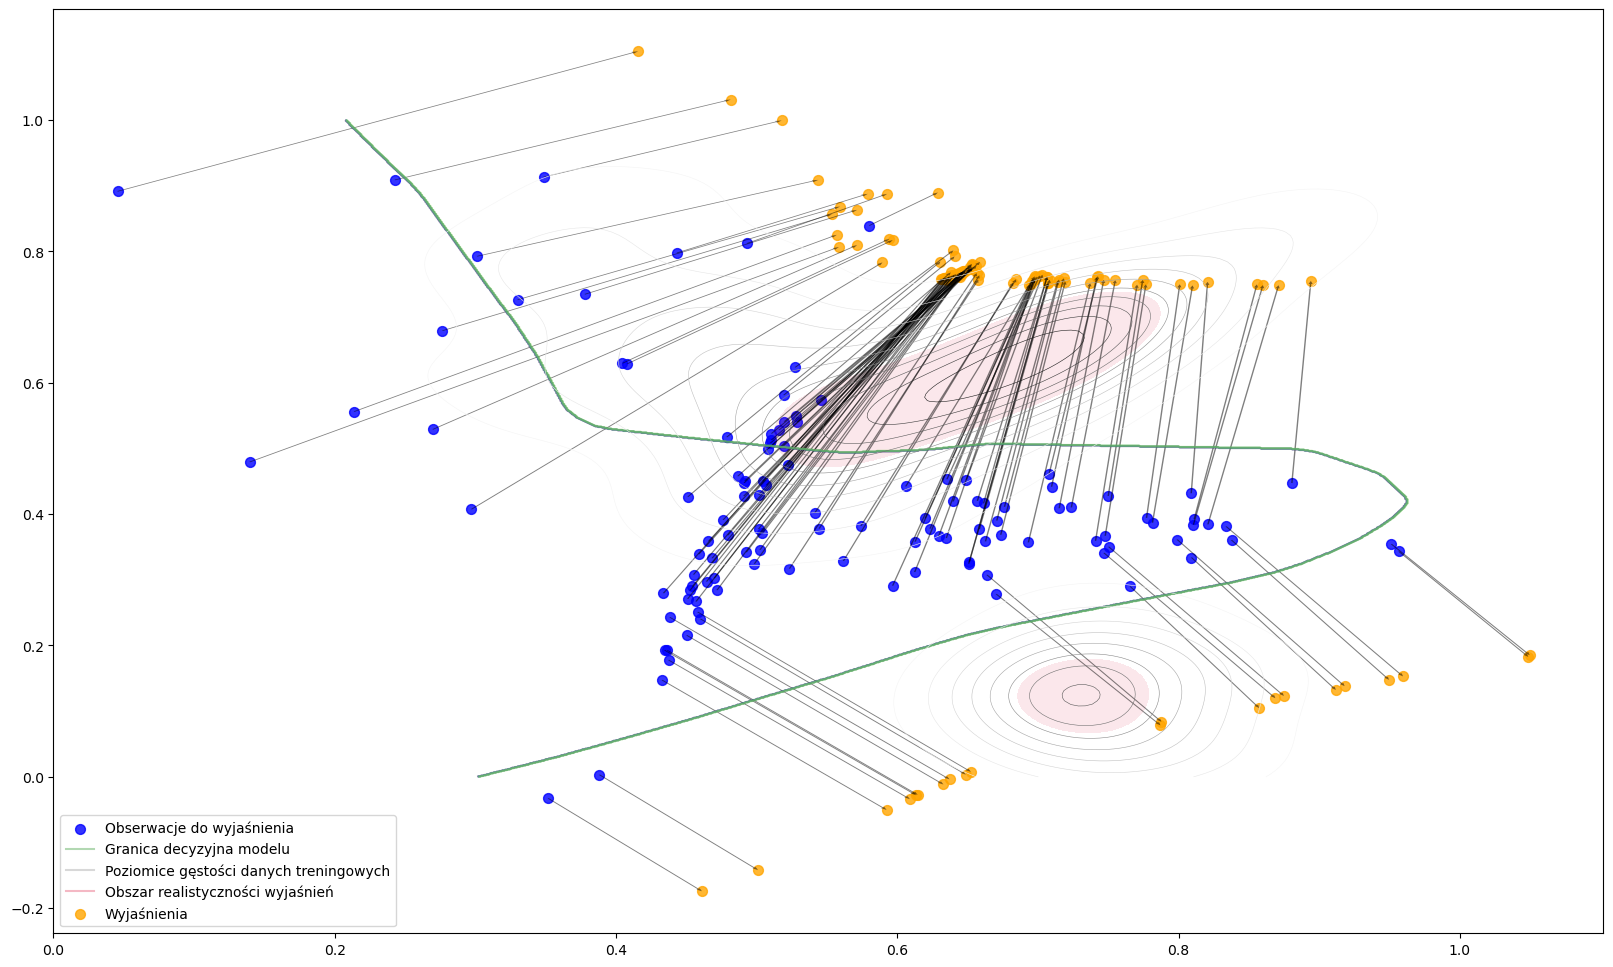

In [16]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

# Wizualizacja wygenerowanych wyjaśnień
if not FINAL_EVALUATION_MODE:
    fig, ax = plot_explanation_setup(
        X_explain,
        X_new=X_new,
        disc_model=disc_model,
        gen_model=gen_model,
        log_prob_threshold=log_prob_threshold
    )
    fig.show()

# Twoje Rozwiązanie
W tej sekcji należy umieścić Twoje rozwiązanie. Wprowadzaj zmiany wyłącznie tutaj!

Twoim zadaniem jest implementacja funkcji ```your_generate_explanations```.
Pamiętaj, że definicja funkcji nie powinna być zmieniana, a także wynikowa tablica rezultatów powinna być tego samego rozmiaru co tablica wejściowa punktów do wyjaśnień.

In [17]:
from sklearn.cluster import KMeans

def your_generate_explanations(
        X_explain: np.ndarray, 
        y_explain: np.ndarray, 
        disc_model: MultilayerPerceptron,
        gen_model: KDE,
        log_prob_threshold: float
    ) -> np.ndarray:
    
    def _get_cluster_centroids(gen_model, classs=1, num_clusters=2, log_prob_threshold=None, min_val_x=-0, max_val_x=1, min_val_y=-0, max_val_y=1, blur_strength=2):
        """
        Estimates cluster centroids of the generative model's distribution.

        Args:
            model: The generative model (assumed to take input as (x, y) coordinates and return log probabilities).
            num_clusters: The number of clusters to find.
            log_prob_threshold: Optional log probability threshold to filter the distribution.
            blur_strength: Controls the blurring, lower values mean less blur (integer).

        Returns:
            A numpy array of shape (num_clusters, 2) representing the centroids of the clusters.
        """

        xline = torch.linspace(min_val_x, max_val_x, 200)
        yline = torch.linspace(min_val_y, max_val_y, 200)

        xgrid, ygrid = torch.meshgrid(xline, yline)
        xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

        with torch.no_grad():
            zgrid = gen_model(xyinput, torch.full((40000, 1), float(classs))).exp().reshape(200, 200).numpy()

        # Filter out areas below the threshold if specified
        if log_prob_threshold is not None:
            prob_threshold_exp = np.exp(log_prob_threshold)
            zgrid[zgrid < prob_threshold_exp] = 0  # Zero out densities below threshold

        # Manual Gaussian Blur (Approximate) - Replaced scipy.ndimage.gaussian_filter
        def _gaussian_blur(image, strength):
            kernel_size = 2 * strength + 1
            kernel = np.zeros((kernel_size, kernel_size))
            center = kernel_size // 2
            for i in range(kernel_size):
                for j in range(kernel_size):
                    dist_sq = (i - center)**2 + (j - center)**2
                    kernel[i, j] = np.exp(-dist_sq / (2 * strength**2))
            kernel /= np.sum(kernel)
            blurred_image = np.zeros_like(image)
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    for k in range(kernel_size):
                        for l in range(kernel_size):
                            row = i - strength + k
                            col = j - strength + l
                            if 0 <= row < image.shape[0] and 0 <= col < image.shape[1]:
                                blurred_image[i, j] += image[row, col] * kernel[k, l]
            return blurred_image

        zgrid_blurred = _gaussian_blur(zgrid, blur_strength)

        # Prepare data for clustering. Use the smoothed density values.
        xy_coords = np.stack([xgrid.numpy().flatten(), ygrid.numpy().flatten()], axis=1)
        density_values = zgrid_blurred.flatten().reshape(-1, 1)

        # Handle the edge case where no data is above the threshold after filtering.
        if np.sum(density_values > 0) == 0:
            print("Warning: No data points above the threshold.  Returning centroids at (0.5, 0.5).")
            return np.array([[0.5, 0.5]] * num_clusters)  # Return a default centroid.

        # Perform K-Means clustering
        kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10) # Added n_init to silence warning.
        try:
            kmeans.fit(xy_coords, sample_weight=density_values.flatten())
        except ValueError as e:
            if "Number of labels is 1" in str(e):  # If only one cluster is found.
                print("Warning: Only one cluster was found. Returning the mean of all points as the centroid.")
                return np.array([np.mean(xy_coords, axis=0)] * num_clusters)
            else:
                raise  # Re-raise other ValueErrors.

        centroids = kmeans.cluster_centers_

        return centroids
    
    num_steps: int = 200
    lr: float = 0.01
        
    min_x, max_x = np.min(X_explain[:,0]), np.max(X_explain[:,0])
    min_y, max_y = np.min(X_explain[:,1]), np.max(X_explain[:,1])
    
    centroids = []
    centroids.append(torch.tensor(_get_cluster_centroids(gen_model, classs=0, num_clusters=5, log_prob_threshold=log_prob_threshold, min_val_x=min_x, min_val_y=min_y, max_val_x=max_x, max_val_y=max_y)))
    centroids.append(torch.tensor(_get_cluster_centroids(gen_model, classs=1, num_clusters=5, log_prob_threshold=log_prob_threshold, min_val_x=min_x, min_val_y=min_y, max_val_x=max_x, max_val_y=max_y)))
    
    x_orig = torch.tensor(X_explain, dtype=torch.float32)
    target = torch.tensor(y_explain, dtype=torch.float32)

    # Definicja nowych punktów X jako wyjaśnienia.
    x_new = torch.tensor(X_explain, requires_grad=True)
    
    optimizer = torch.optim.Adam([x_new], lr=lr)
    bce_loss = torch.nn.BCEWithLogitsLoss(reduction='none')

    for curr_step in range(num_steps):
        optimizer.zero_grad()

        # Prediction Loss (Binary Cross Entropy)
        pred = disc_model(x_new)
        pred_loss = bce_loss(pred, target)

        # Distance Loss (Squared L2)
        dist_loss = torch.sum((x_orig - x_new)**2, axis=1, keepdim=True)
        
        batch_size = x_new.shape[0]
        dist_loss_centroids = torch.zeros((batch_size, 1), dtype=x_new.dtype, device=x_new.device)

        for i in range(len(centroids)):
            mask = (y_explain == i).squeeze()

            if mask.any():
                distances = torch.sum((centroids[i] - x_new[mask, :].unsqueeze(1))**2, dim=2)
                min_distances = torch.min(distances, dim=1)[0]
                dist_loss_centroids[mask] = min_distances.unsqueeze(1) 

        # Total Loss
        total_loss = dist_loss_centroids
        total_loss = total_loss.mean()

        total_loss.backward()
        optimizer.step()
            
    results = x_new.detach().numpy()

    assert results.shape == X_explain.shape
    return results

# Ewaluacja

Uruchomienie poniższej komórki pozwoli sprawdzić, ile punktów zdobyłoby Twoje rozwiązanie na dostępnych danych. Przed wysłaniem upewnij się, że cały notebook wykonuje się od początku do końca bez błędów i bez konieczności ingerencji użytkownika po wybraniu opcji "Run All".

In [18]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

def scale(x, lower=0.50, upper=1.00, max_points=1.0):
    """Funkcja skalująca liniowo wynik."""
    scaled = min(max(x, lower), upper)
    return (scaled - lower) / (upper - lower) * max_points


def calculate_average_distance(X_orig, X_new):
    """Oblicz średnią odległość L2 pomiędzy punktami."""
    distances = np.sqrt(np.sum((X_orig - X_new)**2, axis=1))
    return np.mean(distances)


def calculate_validity_criterion(disc_model, X_new):
    """Oblicz procent obserwacji, które poprawnie przekraczają granicę decyzyjną."""    
    with torch.no_grad():
        cf_preds = disc_model.predict(X_new)
    return np.mean((cf_preds > 0.5).numpy())


def calculate_plausibility_criterion(gen_model, X_new, log_prob_threshold):
    """Oblicz procent obserwacji powyżej progu realistyczności."""
    with torch.no_grad():
        cf_log_probs = gen_model(torch.tensor(X_new, dtype=torch.float32), torch.ones((X_new.shape[0], 1)))
        return torch.mean((cf_log_probs >= log_prob_threshold).float()).item()


def calculate_final_metric(X_explain, X_new, disc_model, gen_model, verbose=True):
    """Oblicz ostateczną metrykę."""
    LOG_PROB_THRESHOLD = log_prob_threshold
    DISTANCE_UPPER_BOUND = 0.30
    DISTANCE_LOWER_BOUND = 0.22
    VALIDITY_UPPER_BOUND = 1.00
    VALIDITY_LOWER_BOUND = 0.50
    PLAUSIBILITY_UPPER_BOUND = 1.00
    PLAUSIBILITY_LOWER_BOUND = 0.50
    
    avg_distance = calculate_average_distance(X_explain, X_new)
    distances = 1 if avg_distance < DISTANCE_LOWER_BOUND else max(0, min(1, (DISTANCE_UPPER_BOUND - avg_distance) / (DISTANCE_UPPER_BOUND - DISTANCE_LOWER_BOUND)))

    validity_rate = calculate_validity_criterion(disc_model, X_new)
    validity_rate = scale(validity_rate, VALIDITY_LOWER_BOUND, VALIDITY_UPPER_BOUND)
    
    plausibility_rate = calculate_plausibility_criterion(gen_model, X_new, LOG_PROB_THRESHOLD)
    plausibility_rate = scale(plausibility_rate, PLAUSIBILITY_LOWER_BOUND, PLAUSIBILITY_UPPER_BOUND)

    if verbose:
        print(f"Średnia odległość: {avg_distance:.4f}\n")
        print(f"Wynik: Odległość wyjaśnień: {distances:.4f}")
        print(f"Wynik: Skuteczność zmiany decyzji klasyfikatora: {validity_rate:.4f}")
        print(f"Wynik: Skuteczność realistyczności wyjaśnień: {plausibility_rate:.4f}")
        print("-"*30)
    
    # Obliczanie finalnej metryki
    score = 100 * validity_rate * (plausibility_rate + distances) / 2
    final_metric = int(round(score))
    print(f"Estymowana liczba punktów za zadanie: {final_metric}")
    return final_metric


if not FINAL_EVALUATION_MODE:
    X_new = your_generate_explanations(X_explain, y_explain, disc_model=disc_model, gen_model=gen_model, log_prob_threshold=log_prob_threshold)
    final_score = calculate_final_metric(X_explain, X_new, disc_model, gen_model)


Średnia odległość: 0.2095

Wynik: Odległość wyjaśnień: 1.0000
Wynik: Skuteczność zmiany decyzji klasyfikatora: 1.0000
Wynik: Skuteczność realistyczności wyjaśnień: 1.0000
------------------------------
Estymowana liczba punktów za zadanie: 100


Podczas sprawdzania model zostanie zapisany jako `your_model.pkl` i oceniony na zbiorze walidacyjnym oraz testowym.

In [19]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

if FINAL_EVALUATION_MODE:
    import cloudpickle

    OUTPUT_PATH = "file_output"
    FUNCTION_FILENAME = "your_model.pkl"
    FUNCTION_OUTPUT_PATH = os.path.join(OUTPUT_PATH, FUNCTION_FILENAME)

    if not os.path.exists(OUTPUT_PATH):
        os.makedirs(OUTPUT_PATH)

    with open(FUNCTION_OUTPUT_PATH, "wb") as f:
        cloudpickle.dump(your_generate_explanations, f)